# A demo of the pyINSPECTA package

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 150

from pyINSPECTA import SDHDF

We load in the data - which is represented by a dataclass

In [2]:
data = SDHDF("/Users/tho822/data/parkes/uwl_200406_121917.extract.hdf")
print(data)

SDHDF(filename='/Users/tho822/data/parkes/uwl_200406_121917.extract.hdf', in_memory=False, parallel=False)


/Users/tho822/dev/sdhdf_tools/python/pyINSPECTA/sdhdf.py:175: UserWarning: 
                    No flags found for sub-band 'band_SB0' in file '/Users/tho822/data/parkes/uwl_200406_121917.extract.hdf'!
                    SDHDF version is 1.9.
                    Flags will be set to all zeros.
                    
  warnings.warn(
/Users/tho822/dev/sdhdf_tools/python/pyINSPECTA/sdhdf.py:175: UserWarning: 
                    No flags found for sub-band 'band_SB1' in file '/Users/tho822/data/parkes/uwl_200406_121917.extract.hdf'!
                    SDHDF version is 1.9.
                    Flags will be set to all zeros.
                    
  warnings.warn(
/Users/tho822/dev/sdhdf_tools/python/pyINSPECTA/sdhdf.py:175: UserWarning: 
                    No flags found for sub-band 'band_SB2' in file '/Users/tho822/data/parkes/uwl_200406_121917.extract.hdf'!
                    SDHDF version is 1.9.
                    Flags will be set to all zeros.
                    
  warnings.warn

The SDHDF class contains data on the beams and metadata

In [3]:
print(data.beams)
print(data.metadata)

[Beam(label='beam_0', filename='/Users/tho822/data/parkes/uwl_200406_121917.extract.hdf', definition={'version': '1.9', 'subband': {'astronomy': {'data': 'astronomy_data/data', 'frequency': 'astronomy_data/frequency', 'metadata': 'metadata/obs_params'}, 'calibrator': {'flags': 'calibrator_data/cal_data_flags', 'data_on': 'calibrator_data/cal_data_off', 'data_off': 'calibrator_data/cal_data_on', 'frequency': 'calibrator_data/frequency', 'metadata': 'metadata/cal_obs_params'}}, 'beam': {'metadata': {'band_params': 'metadata/band_params', 'cal_band_params': 'metadata/cal_band_params'}}, 'config': {'backend': '/config/backend_config'}, 'metadata': {'beam_params': '/metadata/beam_params', 'history': '/metadata/history', 'primary_header': '/metadata/primary_header', 'software': '/metadata/software_versions'}}, in_memory=False, client=None)]
MetaData(filename='/Users/tho822/data/parkes/uwl_200406_121917.extract.hdf')


The beam data can be accessed from the beams list or by using the beam name

In [4]:
print(data.beams[0])
print(data.beam_0)

Beam(label='beam_0', filename='/Users/tho822/data/parkes/uwl_200406_121917.extract.hdf', definition={'version': '1.9', 'subband': {'astronomy': {'data': 'astronomy_data/data', 'frequency': 'astronomy_data/frequency', 'metadata': 'metadata/obs_params'}, 'calibrator': {'flags': 'calibrator_data/cal_data_flags', 'data_on': 'calibrator_data/cal_data_off', 'data_off': 'calibrator_data/cal_data_on', 'frequency': 'calibrator_data/frequency', 'metadata': 'metadata/cal_obs_params'}}, 'beam': {'metadata': {'band_params': 'metadata/band_params', 'cal_band_params': 'metadata/cal_band_params'}}, 'config': {'backend': '/config/backend_config'}, 'metadata': {'beam_params': '/metadata/beam_params', 'history': '/metadata/history', 'primary_header': '/metadata/primary_header', 'software': '/metadata/software_versions'}}, in_memory=False, client=None)
Beam(label='beam_0', filename='/Users/tho822/data/parkes/uwl_200406_121917.extract.hdf', definition={'version': '1.9', 'subband': {'astronomy': {'data': 'a

The Beam class contains the subband data - these can be accessed in a similar way to the beams

In [5]:
print(data.beam_0.subbands)
print(data.beam_0.subbands[0])
print(data.beam_0.band_SB0)


[SubBand(label='band_SB0', filename='/Users/tho822/data/parkes/uwl_200406_121917.extract.hdf', definition={'version': '1.9', 'subband': {'astronomy': {'data': 'astronomy_data/data', 'frequency': 'astronomy_data/frequency', 'metadata': 'metadata/obs_params'}, 'calibrator': {'flags': 'calibrator_data/cal_data_flags', 'data_on': 'calibrator_data/cal_data_off', 'data_off': 'calibrator_data/cal_data_on', 'frequency': 'calibrator_data/frequency', 'metadata': 'metadata/cal_obs_params'}}, 'beam': {'metadata': {'band_params': 'metadata/band_params', 'cal_band_params': 'metadata/cal_band_params'}}, 'config': {'backend': '/config/backend_config'}, 'metadata': {'beam_params': '/metadata/beam_params', 'history': '/metadata/history', 'primary_header': '/metadata/primary_header', 'software': '/metadata/software_versions'}}, beam_label='beam_0', in_memory=False, client=None), SubBand(label='band_SB1', filename='/Users/tho822/data/parkes/uwl_200406_121917.extract.hdf', definition={'version': '1.9', 'su

At the bottom level, the data itself is held as either an `xarray.Dataset` or `pandas.DataFrame` depending on the data type

In [6]:
data.beam_0.band_SB0.astronomy_dataset

<xarray.Dataset>
Dimensions:        (time: 110, frequency: 1024, polarization: 4, bin: 1,
                    meta: 25)
Coordinates: (12/26)
    ELAPSED_TIME   (time) float64 0.262 0.786 1.311 1.835 ... 56.36 56.88 57.41
    TIME_DB        (time) object b'2020-04-06T12:19:17.26Z' ... b'2020-04-06T...
    MJD            (time) float64 5.895e+04 5.895e+04 ... 5.895e+04 5.895e+04
    UTC            (time) object b'12:19:17.26' ... b'12:20:14.41'
    UT_DATE        (time) object b'2020-04-06' b'2020-04-06' ... b'2020-04-06'
    AEST           (time) object b'22:19:18.16' ... b'22:20:15.30'
    ...             ...
    ZE_DRIVE_RATE  (time) float64 0.0738 0.0214 0.0 0.0 ... 0.0837 0.1 0.1 0.059
    HOUR_ANGLE     (time) float64 340.8 340.8 340.8 340.8 ... 341.0 341.0 341.0
    PARA_ANGLE     (time) float64 -154.2 -154.2 -154.2 ... -154.5 -154.5 -154.5
    WIND_DIR       (time) float64 9.0 9.0 9.0 9.0 9.0 ... 10.0 10.0 10.0 9.591
    WIND_SPD       (time) float64 98.62 103.9 102.9 97.65 ... 98.56 96.46 97.64
  * frequency      (frequency) float32 704.0 704.1 704.3 ... 831.7 831.9 832.0
Dimensions without coordinates: time, polarization, bin, meta
Data variables:
    data           (time, polarization, frequency, bin) float32 4.83e+07 ... ...
    flag           (time, polarization, frequency, bin) float32 0.0 0.0 ... 0.0
    metadata       (time, meta) object 0.262 ... 97.6381

In [7]:
data.beam_0.band_SB0.astronomy_dataset.metadata

<xarray.DataArray 'metadata' (time: 110, meta: 25)>
array([[0.262, b'2020-04-06T12:19:17.26Z', 58945.51339400001, ...,
        -154.2, 9.0, 98.6214],
       [0.7859999999999999, b'2020-04-06T12:19:17.79Z', 58945.5134, ...,
        -154.2, 9.0, 103.8643],
       [1.311, b'2020-04-06T12:19:18.31Z', 58945.51340599999, ...,
        -154.2, 9.0, 102.8928],
       ...,
       [56.361000000000004, b'2020-04-06T12:20:13.36Z', 58945.514044,
        ..., -154.5, 10.0, 98.5562],
       [56.885, b'2020-04-06T12:20:13.89Z', 58945.51405, ..., -154.5,
        10.0, 96.459],
       [57.41, b'2020-04-06T12:20:14.41Z', 58945.51405599999, ...,
        -154.5, 9.5905, 97.6381]], dtype=object)
Coordinates: (12/25)
    ELAPSED_TIME   (time) float64 0.262 0.786 1.311 1.835 ... 56.36 56.88 57.41
    TIME_DB        (time) object b'2020-04-06T12:19:17.26Z' ... b'2020-04-06T...
    MJD            (time) float64 5.895e+04 5.895e+04 ... 5.895e+04 5.895e+04
    UTC            (time) object b'12:19:17.26' ... b'12:20:14.41'
    UT_DATE        (time) object b'2020-04-06' b'2020-04-06' ... b'2020-04-06'
    AEST           (time) object b'22:19:18.16' ... b'22:20:15.30'
    ...             ...
    AZ_DRIVE_RATE  (time) float64 -0.3738 -0.3214 -0.3 -0.3 ... -0.3 -0.3 -0.3
    ZE_DRIVE_RATE  (time) float64 0.0738 0.0214 0.0 0.0 ... 0.0837 0.1 0.1 0.059
    HOUR_ANGLE     (time) float64 340.8 340.8 340.8 340.8 ... 341.0 341.0 341.0
    PARA_ANGLE     (time) float64 -154.2 -154.2 -154.2 ... -154.5 -154.5 -154.5
    WIND_DIR       (time) float64 9.0 9.0 9.0 9.0 9.0 ... 10.0 10.0 10.0 9.591
    WIND_SPD       (time) float64 98.62 103.9 102.9 97.65 ... 98.56 96.46 97.64
Dimensions without coordinates: time, meta

For example, using the `xarray.DataArray` we have a lot of power to visualise and manipulate the data - see the [xarray documentation](https://docs.xarray.dev/en/stable/user-guide/data-structures.html) for more information.

I've also implemented some commonly-used commands on methods inside the dataclasses. For example, we can make a waterfall plot, plot a spectrum, and inspect the metadata. This is all done with `xarray` or `pandas` under the hood - so much more complex investigations are possible using those tools.

Here's a waterfall plot, which can be called from the `SDHDF` and `Beam` classes, but is really calling the base method on the `Subband` class.

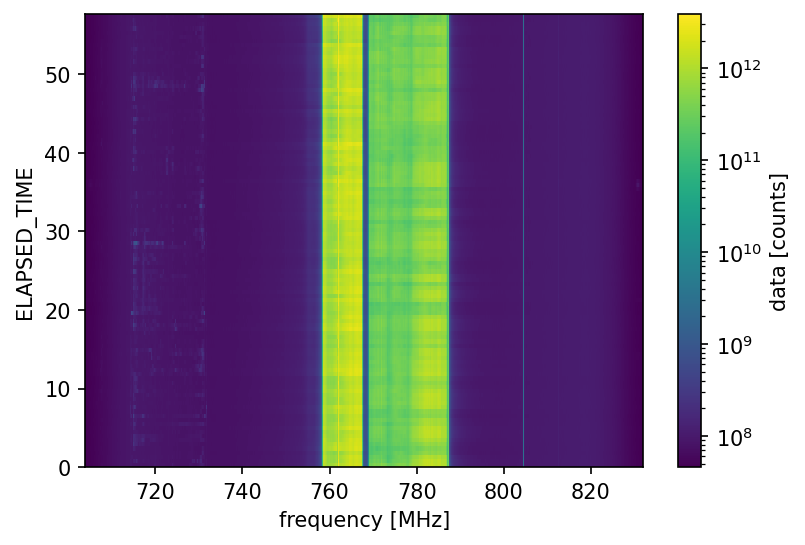

In [8]:
_ = data.plot_waterfall(beam=0, subband=0, polarization=0, flag=True, norm=plt.cm.colors.LogNorm(), y="ELAPSED_TIME")

And a similar plot for the spectrum

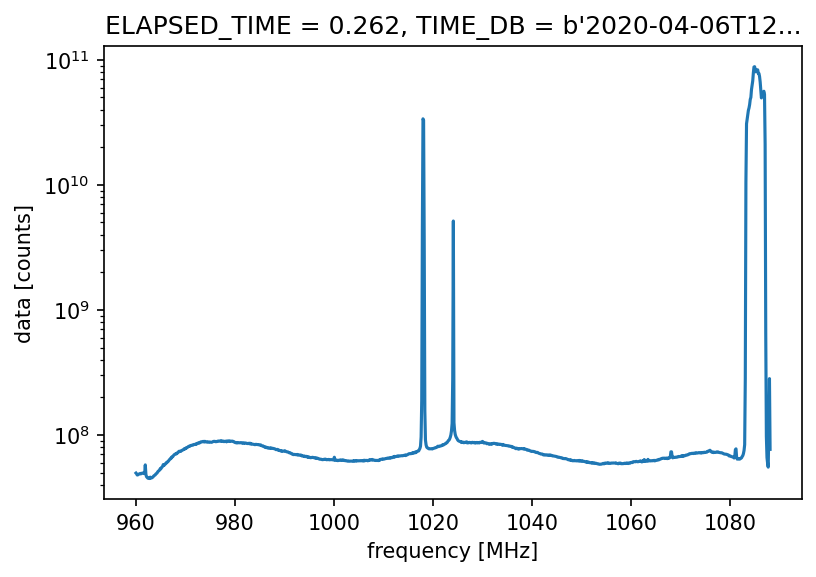

In [9]:
ax = data.plot_spectrum(beam=0, subband=2)
ax.set_yscale("log")

A wide-band plot can be called from the `SDHDF` object, but it also really just calling down to the `Beam` class.

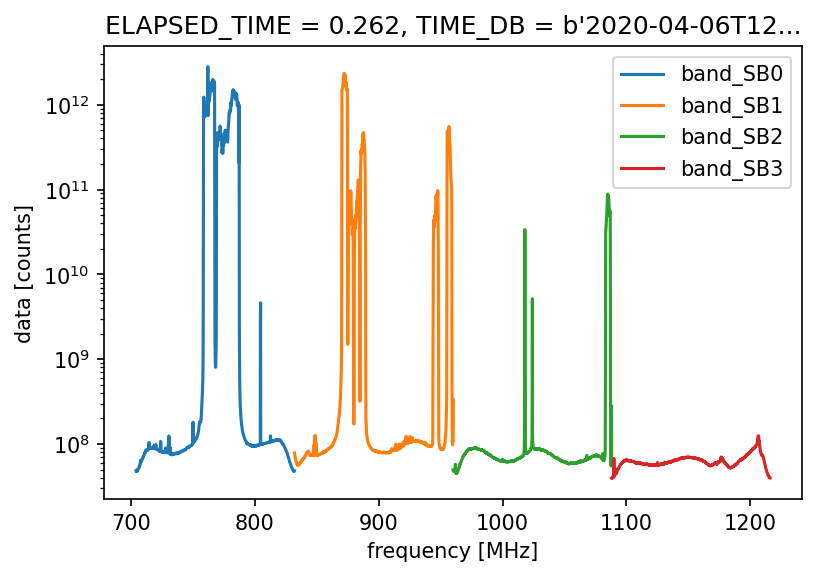

In [10]:
ax = data.plot_wide(beam=0, polarization=0)
ax.set_yscale("log")

Finally, we can inspect some metadata from our observations:

In [11]:
data.print_metadata(format="fancy_outline")

beam_params:
╒═════════╤══════════════╕
│ LABEL   │ beam_0       │
│ N_BANDS │ 4            │
│ SOURCE  │ 3c273_calOff │
╘═════════╧══════════════╛
history:
╒════════════╤═════════════════════════╤══════════════════════════════════╕
│ DATE       │ 2020-04-07-10:47:21     │ 2020-04-07-10:47:21              │
│ PROC       │ sdhdf_writer            │ metadata_query                   │
│ PROC_DESCR │ None                    │ Query the observational metadata │
│ PROC_ARGS  │ Write SDHDF format file │ None                             │
│ PROC_HOST  │ euryale.atnf.csiro.au   │ dalmore.atnf.csiro.au            │
╘════════════╧═════════════════════════╧══════════════════════════════════╛
primary_header:
╒═════════════════════╤═════════════════════╕
│ DATE                │ 2020-04-07-10:47:10 │
│ HDR_DEFN            │ SDHDF               │
│ HDR_DEFN_VERSION    │ 1.9                 │
│ FILE_FORMAT         │ HDF                 │
│ FILE_FORMAT_VERSION │ 5.0                 │
│ SCHED_BLOCK_ID   

Writing the data out back to disk isn't possible, yet...

In [12]:
data.write("test.hdf5")

NotImplementedError: 

I have implemented flagging routines, though!

In [13]:
data.auto_flag_rfi(sigma=3, n_windows=50)

Flagging persistent RFI:   0%|          | 0/31 [00:00<?, ?it/s]

Flagging beams:   0%|          | 0/1 [00:00<?, ?it/s]

Flagging subbands:   0%|          | 0/4 [00:00<?, ?it/s]

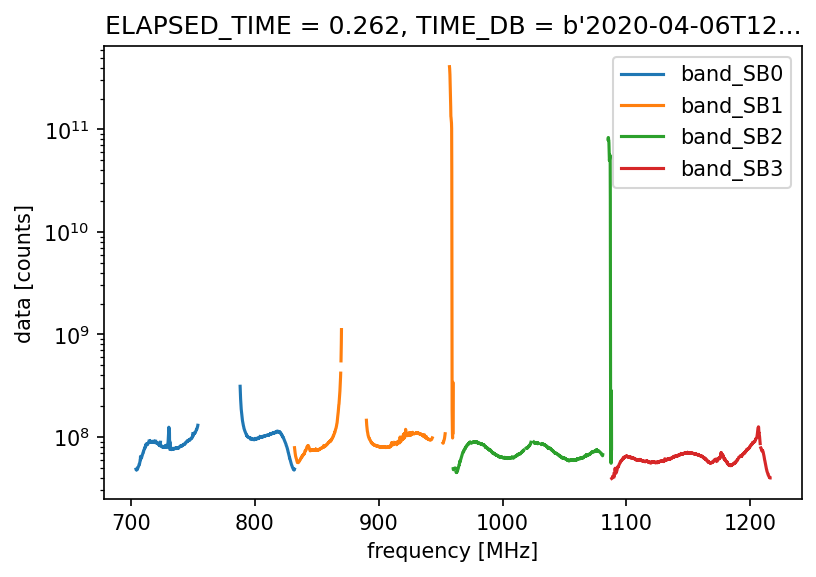

In [14]:
ax = data.plot_wide(beam=0, polarization=0, flag=True)
ax.set_yscale("log")

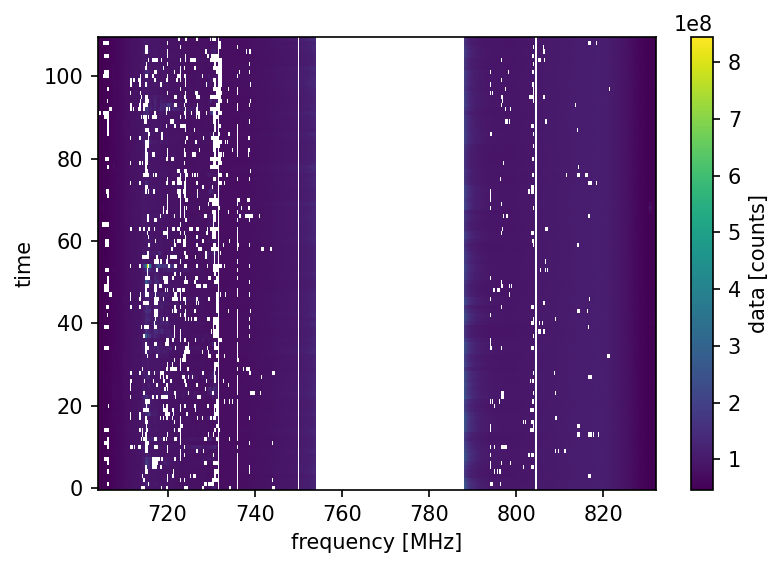

In [15]:
ax = data.plot_waterfall(beam=0, subband=0, polarization=0, flag=True)